In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\imenf\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\imenf\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\imenf\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\imenf\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("C:\\Users\\imenf\\Data Science\\prostate.csv")
df.head()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
0,1,0,65,1,2,1,1.4,0.0,6
1,2,0,72,1,3,2,6.7,0.0,7
2,3,0,70,1,1,2,4.9,0.0,6
3,4,0,76,2,2,1,51.2,20.0,7
4,5,0,69,1,1,1,12.3,55.9,6


In [3]:
#Standardize the Variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('GLEASON', axis=1))
scaled_features = scaler.transform(df.drop('GLEASON',
                                           axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_features,
                       columns=df.columns[:-1])
df_feat.head()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL
0,-1.727499,-0.82098,-0.159466,-0.281620,-0.271381,-0.347770,-0.701440,-0.862988
1,-1.718383,-0.82098,0.914405,-0.281620,0.729830,2.875464,-0.436059,-0.862988
2,-1.709267,-0.82098,0.607585,-0.281620,-1.272591,2.875464,-0.526188,-0.862988
3,-1.700150,-0.82098,1.528045,2.961273,-0.271381,-0.347770,1.792145,0.228509
4,-1.691034,-0.82098,0.454175,-0.281620,-1.272591,-0.347770,-0.155655,2.187746


In [8]:
#Model Development and Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test,\
    y_train, y_test = train_test_split(scaled_features,
                                       df['GLEASON'],
                                       test_size=0.30)

In [10]:
# We'll start with k = 1.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

C:\Users\imenf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  5 10  1  0  0]
 [ 0  0  6 19 12  3  3]
 [ 0  0  5  9 18  2  5]
 [ 0  0  1  1  7  0  1]
 [ 0  0  0  2  1  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.28      0.31      0.29        16
           6       0.44      0.44      0.44        43
           7       0.46      0.46      0.46        39
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         3

    accuracy                           0.37       114
   macro avg       0.17      0.17      0.17       114
weighted avg       0.36      0.37      0.37       114



C:\Users\imenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## evaluate with different k value

In [12]:
error_rate = []

In [13]:
# Will take some time
for i in range(1, 40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\imenf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\imenf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\imenf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\imenf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

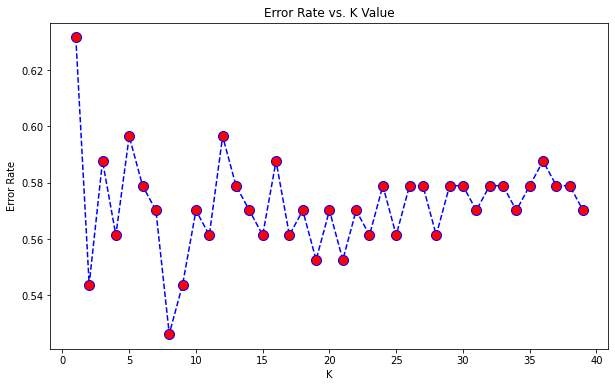

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

## evaluate with k=1 value

In [16]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

In [17]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

C:\Users\imenf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))

WITH K = 1
Confusion Matrix
[[ 0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  5 10  1  0  0]
 [ 0  0  6 19 12  3  3]
 [ 0  0  5  9 18  2  5]
 [ 0  0  1  1  7  0  1]
 [ 0  0  0  2  1  0  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.28      0.31      0.29        16
           6       0.44      0.44      0.44        43
           7       0.46      0.46      0.46        39
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         3

    accuracy                           0.37       114
   macro avg       0.17      0.17      0.17       114
weighted avg       0.36      0.37      0.37       114



C:\Users\imenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imenf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
